In [1]:
import pickle
import json
import random
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open("datasets/smallerdata.json", 'r') as f:
    tweets = json.load(f)
random.shuffle(tweets)
train = tweets[:int(round(4*len(tweets)/5))]
test = tweets[int(round(4*len(tweets)/5)):len(tweets)]
xtrain = []
ytrain = []
xtest = []
ytest = []

for tweet in train:
    xtrain.append(tweet['content'])
    ytrain.append(tweet['label'])
    
for tweet in test:
    xtest.append(tweet['content'])
    ytest.append(tweet['label'])

    
print(xtrain[:5])
print(ytrain[:5])
print(xtest[:5])
print(ytest[:5])

['RT @AlexaKaySam: #IHaveADreamThat we could be more understanding and loving toward people', '@todd1985 No, I think she leaves for a visit with her Nana tomorrow. ', "@edsaint awwwwww.......wow I'm such a girl ", 'Cannot stop laughing! Funny as hell!! http://t.co/PZxXJygyVQ', "RT @DocDarnell: Dude, Where's My Cardiologist? #MakeAMovieAFatty"]
[1, 0, 0, 1, 1]
['Straight Outta Africa #addamovieruinamovie @midnight', 'RT @carolinagirl63: Obama Hid “Jesus” at Catholic University – But Allows “Allah” to Be Widely Displayed During Islamic Center Speech https…', 'coffee is my passion…well, at least now', 'RT @dustin_temple10: Clinton and ISIS funded by same money https://t.co/Td5bcUgzg5', "RT @evokepotential: #IGetDepressedWhen people have coughing fits on buses and then other's join the chorus."]
[1, 1, 1, 1, 1]


In [3]:
# preprocessklearn.py file (you are actually supposed to import this but for demonstration i have just put this in)
# you can do this by putting the line "from preprocesssklearn import *"
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
def removespchar(text):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

def removestopwords(text, islowercase=True):
    tokenizer=ToktokTokenizer()
    stopwordList=nltk.corpus.stopwords.words('english')
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if islowercase:
        filteredTokens = [token for token in tokens if token not in stopwordList]
    else:
        filteredTokens = [token for token in tokens if token.lower() not in stopwordList]
    filteredText = ' '.join(filteredTokens)    
    return filteredText

In [4]:
for i in range(len(xtrain)):
    xtrain[i] = removespchar(xtrain[i])
    xtrain[i] = stemmer(xtrain[i])
    xtrain[i] = removestopwords(xtrain[i])

for i in range(len(xtest)):
    xtest[i] = removespchar(xtest[i])
    xtest[i] = stemmer(xtest[i])
    xtest[i] = removestopwords(xtest[i])
    
print(xtrain[:5])
print(xtest[:5])

['RT alexakaysam ihaveadreamthat could understand love toward peopl', 'todd1985 No I think leav visit nana tomorrow', 'edsaint awwwwwwwow Im girl', 'cannot stop laugh funni hell httptcopzxxjygyvq', 'RT docdarnel dude My cardiologist makeamovieafatti']
['straight outta africa addamovieruinamovi midnight', 'RT carolinagirl63 obama hid jesu cathol univers allow allah Be wide display dure islam center speech http', 'coffe passionwel least', 'RT dustintemple10 clinton isi fund money httpstcotd5bcugzg5', 'RT evokepotenti igetdepressedwhen peopl cough fit buse join choru']


In [5]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
xtrain=cv.fit_transform(xtrain)
xtest=cv.transform(xtest)

In [6]:
print(xtrain[0])

  (0, 141167)	1
  (0, 309800)	1
  (0, 173824)	1
  (0, 10381)	1
  (0, 141168)	1
  (0, 58746)	1
  (0, 309801)	1
  (0, 173825)	1


In [7]:
%matplotlib inline

In [17]:
svm=LinearSVC(C=110)
svm.fit(xtrain,ytrain)
svmpred = svm.predict(xtest)
print(svmpred[:5])
print(ytest[:5])
print("Support Vector Machine Accuracy Score -> ",accuracy_score(svmpred, ytest)*100)

[0 0 0 0 1]
[1, 1, 1, 1, 1]
Support Vector Machine Accuracy Score ->  71.31666666666666


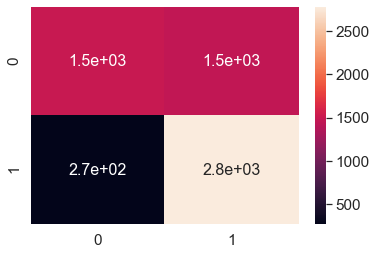

In [18]:
array = confusion_matrix(ytest,svmpred,labels=[1,0])
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
nb=naive_bayes.MultinomialNB()
nb.fit(xtrain,ytrain)
nbpred = nb.predict(xtest)
print(nbpred[:5])
print(ytest[:5])
print("Naive Bayes Accuracy Score -> ",accuracy_score(nbpred, ytest)*100)

In [ ]:
array = confusion_matrix(ytest,nbpred,labels=[1,0])
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr.fit(xtrain,ytrain)
lrpred = lr.predict(xtest)
print(lrpred[:5])
print(ytest[:5])
print("Logistic Regression Accuracy Score -> ",accuracy_score(lrpred, ytest)*100)

In [ ]:
array = confusion_matrix(ytest,lrpred,labels=[1,0])
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
pickle.dump(cv, open("savedModel/sklearnpynb/BoW.sav","wb"))
pickle.dump(nb, open("savedModel/sklearnpynb/nb.sav","wb"))
pickle.dump(svm, open("savedModel/sklearnpynb/svm.sav","wb"))
pickle.dump(lr, open("savedModel/sklearnpynb/lr.sav","wb"))

In [ ]:
import pickle
from preprocesssklearn import *
n = int(input("no of sentences: "))
sentences = [str(input("enter sentence:")) for _ in range(n)]

In [ ]:
for i in range(len(sentences)):
    sentences[i] = removespchar(sentences[i])
    sentences[i] = stemmer(sentences[i])
    sentences[i] = removestopwords(sentences[i])

In [ ]:
cv = pickle.load(open("savedModel/sklearnpynb/BoW.sav","rb"))
nb = pickle.load(open("savedModel/sklearnpynb/nb.sav","rb"))
svm = pickle.load(open("savedModel/sklearnpynb/svm.sav","rb"))
lr = pickle.load(open("savedModel/sklearnpynb/lr.sav","rb"))

In [ ]:
sentences = cv.transform(sentences)
print(svm.predict(sentences))
print(nb.predict(sentences))
print(lr.predict(sentences))